# Magnificent 7 Stock Portfolio Analysis

## Brief 

The Maginifecent 7 stock are Apple, Meta Platform, Tesla, Amazon, Alphabet, Nvidia, and Microsoft. Even with the their strong presents within the market and respected reputation, the turbulance in market conditions, such as Covid- 19, effects each company differently and therefore the volatility  of each stock differs from one company to the next. With the use of portfolio theory, this scripts aims to cater to investor preference whilst still caputuring the gains offered by the the Magnifecent 7 stocks. 

This script is based on several equations:

1. **Expected Portfolio Return:**
 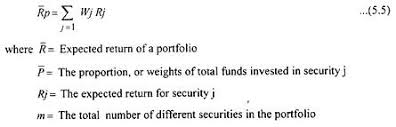

2. **Standard Deviation of Portfolio:**
   -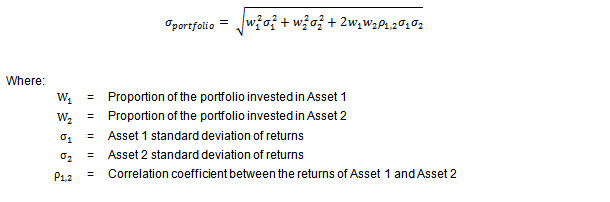
3. **Sharpe Ratio:**
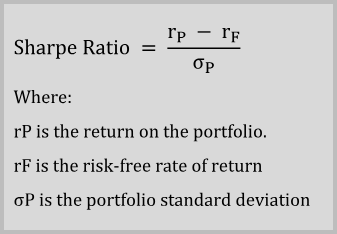


In [10]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt

from pprint import pprint
from sklearn.preprocessing import StandardScaler

# Increase maximum number of rows and columns displayed
pd.set_option('display.max_colwidth', 1)
pd.set_option('expand_frame_repr', False)

In [11]:
raw_price_df = pd.read_csv("data/pivoted_stock_data.csv", index_col = 0)

In [12]:
price_df = raw_price_df.sort_values(["Date"], ascending = True) 

In [13]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']
number_of_symbols = len(symbols)

##Current risk free rate using 10 Year US Treasury Bonds 
rf_rate = 0.045

## First run through of the simulation 


In [14]:

## Calulating the Log Returns - We use Log as its more comparable
log_return = np.log(1 + price_df.pct_change())

## Generate random weights
random_weights = np.array(np.random.random(number_of_symbols))

## Rebalanced weight must be equal to 100%
rebalance_weights = random_weights / np.sum(random_weights)

## Calculation of expected Return,Annualised 
exp_ret = np.sum((log_return.mean() * rebalance_weights) * 252)

### Calculation of Volatility, annualised
exp_vol = np.sqrt( 
    np.dot(
        rebalance_weights.T,
        np.dot(
          log_return.cov() * 252,
            rebalance_weights
        )
    )   
)


##Calculation of Sharpe Ratio. Current risk free rate is 4.5% on 10 Year US Treasury 
sharpe_ratio = (exp_ret - rf_rate) / exp_vol


## Input to data frame for clarity 
weights_df = pd.DataFrame(data={
'random_weights': random_weights,
'rebalance_weights': rebalance_weights
})
print('')
print('='*80)
print('PORTFOLIO WEIGHTS:')
print('-'*80)
print(weights_df)
print('-'*80)

# Do the same with the other metrics.
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_ret,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('')
print('='*80)
print('PORTFOLIO METRICS:')
print('-'*80)
print(metrics_df)
print('-'*80)


PORTFOLIO WEIGHTS:
--------------------------------------------------------------------------------
   random_weights  rebalance_weights
0  0.897877        0.164434         
1  0.857138        0.156973         
2  0.964183        0.176577         
3  0.888458        0.162709         
4  0.475577        0.087096         
5  0.543653        0.099563         
6  0.833521        0.152648         
--------------------------------------------------------------------------------

PORTFOLIO METRICS:
--------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  Portfolio Sharpe Ratio
0  0.261217                    0.276038                       0.783285              
--------------------------------------------------------------------------------


## Monte Carlo Mass Simulation 

In [15]:
num_of_portfolios = 100000

## Weight array of Numpy Zero
all_weights = np.zeros((num_of_portfolios, number_of_symbols))

## Returns array of Numpy Zero 
ret_arr = np.zeros(num_of_portfolios)

## Sharpe array of Numpy Zero
sharpe_arr = np.zeros(num_of_portfolios)

##Volatility array of Numpy Zero
vol_arr = np.zeros(num_of_portfolios)

## Start the simulation 
for ind in range(num_of_portfolios) :
     ##Calulating the weights
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights) 
    
    ## Add weights to the 'weight array'
    all_weights[ind, :] = weights 
    
    ## Expected Log Returns 
    ret_arr[ind] = np.sum((log_return.mean()* weights) * 252)
    
    ## Calulate the volatility and place them inside the 'vol_arr'
    vol_arr[ind]= np.sqrt(
        np.dot(weights.T, np.dot (log_return.cov() * 252, weights))
    )
    
    ##Calculate the Sharpe Ratio
    sharpe_arr[ind] = (ret_arr[ind] - rf_rate) / vol_arr[ind]
    
##Combine all together 
simulation_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

##Create data Frame 
simulations_df = pd.DataFrame(data = simulation_data).T

## Give the columns the Names.
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]

## Make sure the data types are correct, we don't want our floats to be strings.
simulations_df = simulations_df.infer_objects()

# Print out the results.
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)


SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio                                                                                                                                     Portfolio Weights
0  0.285491  0.292507    0.822173      [0.15583956188187595, 0.16939925480269144, 0.13123880841970448, 0.1796498455345568, 0.013192765332828083, 0.17515435641971208, 0.17552540760863114] 
1  0.281198  0.285555    0.827153      [0.174828594949737, 0.18433211850288467, 0.04813467041247955, 0.12030893742913686, 0.15059106344945333, 0.13317879533879765, 0.18862581991751093]   
2  0.299054  0.308313    0.824011      [0.1482605794487923, 0.19083347409507254, 0.054627885425804476, 0.006959814366765918, 0.14373676273712335, 0.17536116942425203, 0.28022031450218954]
3  0.303880  0.285476    0.906836      [0.07290773021130766, 0.24595400308219248, 0.05161414460442231, 0.11678668957032455, 0.2086345026973319, 0.

In [16]:
# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# Return the Min Volatility from the run.
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility)
print('-'*80)


MAX SHARPE RATIO:
--------------------------------------------------------------------------------
Returns              0.39309                                                                                                                                              
Volatility           0.336475                                                                                                                                             
Sharpe Ratio         1.03452                                                                                                                                              
Portfolio Weights    [0.24462907631862277, 0.057823281053666103, 0.001911203388574385, 0.007044858026672519, 0.1279024614663114, 0.5171280960278413, 0.043561023718311644]
Name: 43255, dtype: object
--------------------------------------------------------------------------------

MIN VOLATILITY:
--------------------------------------------------------------------------------
Returns   

## Plotting the Results

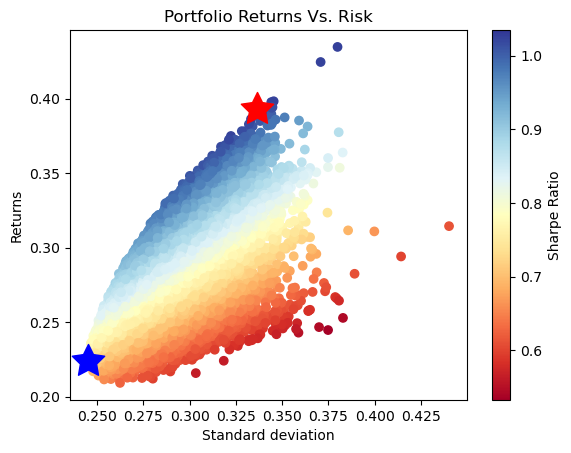

In [17]:
plt.scatter(
    y=simulations_df["Returns"],
    x =simulations_df["Volatility"],
    c=simulations_df["Sharpe Ratio"],
    cmap = 'RdYlBu'
)

## Plot lables
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard deviation')
plt.ylabel('Returns')

# Plot the Max Sharpe Ratio, using a `Red Star`.
plt.scatter(
    max_sharpe_ratio.iloc[1],
    max_sharpe_ratio.iloc[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_volatility.iloc[1],
    min_volatility.iloc[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# plot.
plt.show()



## Conclusion 
To conclude, the Monte Carlo analysis of 100,000 simulations shows that for an investor with a higher risk appetite and the goal of maximising their risk-adjusted return with limited consideration for volatility, Portfolio A, signified by the red star, and with the allocated weights listed below, will accomodate the clients needs.

- Apple (AAPL): 24.46%
- Microsoft (MSFT): 5.78%
- Alphabet (GOOGL): 12.79%
- Amazon (AMZN): 0.70%
- Nvidia (NVDA): 51.71%
- Meta Platform (META): 0.19%
- Tesla (TSLA): 4.36%

Portfolio A's mixture of the 7 magnificent stocks will provide the most risk-adjusted return of 39.309%, with a Sharpe Ratio of 1.03, indicating a favourable risk-adjusted return compared to the risk-free rate. With their assets concentrated in Nvidia and Apple, this suggests that these stocks are the primary source of return from the portfolio.

For Portfolio B, for an investor with a lower appetite for risk and the goal of minimum volatility in their return, the appropriate allocation is:

- Apple (AAPL): 30.61%
- Microsoft (MSFT): 7.73%
- Alphabet (GOOGL): 33.95%
- Amazon (AMZN): 0.20%
- Nvidia (NVDA): 25.91%
- Meta Platform (META): 0.20%
- Tesla (TSLA): 1.41%

Portfolio B, signified by the blue star, represents a strategy focused on minimising the volatility for security while maintaining ample returns. The portfolio achieves a volatility of 24.525%, indicating relatively low variability in returns. The Sharpe ratio of 0.729 suggests a decent risk-adjusted return compared to the risk-free rate. With Apple and Alphabet being a prominent part of the portfolio, this suggests that Alphabet is a relatively low volatility stock or a good hedge to Apple and Nvidia to balance the returns.

Stars can be seen on the portfolio return vs risk chart.
